<a href="https://colab.research.google.com/github/Sid-Oya/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Sidoney_Daley_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [0]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
df.isnull().values.any()

True

In [0]:
df.isnull().sum().sum()

569

In [0]:
dfn = df.replace(np.nan,0)
dfn

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [0]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dfn)
    distortions.append(kmeanModel.inertia_)

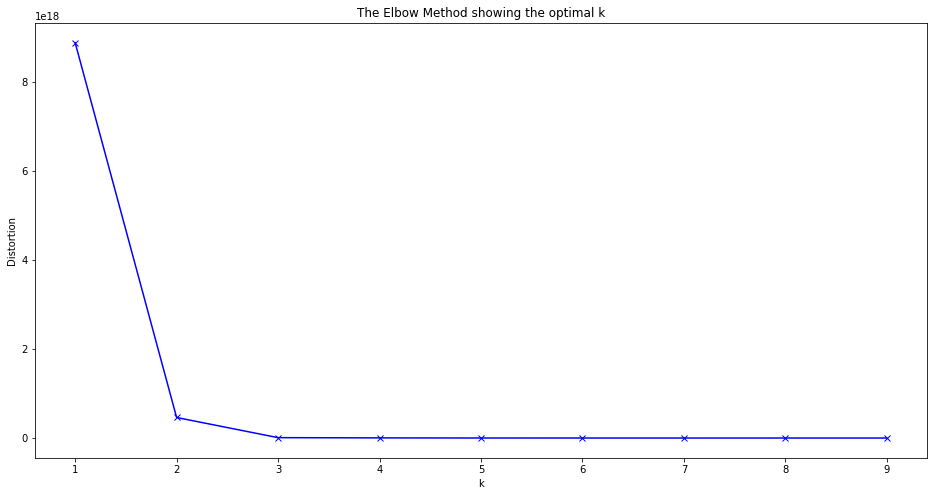

In [0]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [0]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(dfn)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(dfn)
kmeans.cluster_centers_.shape

(3, 32)

In [0]:
centroids = kmeans.cluster_centers_
print(centroids)

[[8.85031002e+07 1.47069429e+01 2.07371429e+01 9.61041429e+01
  7.03518571e+02 9.79085714e-02 1.13894857e-01 9.85661429e-02
  5.58226143e-02 1.84704286e-01 6.27901429e-02 4.27402857e-01
  1.09640143e+00 2.98061571e+00 4.44838429e+01 6.35254286e-03
  2.55627857e-02 3.01913571e-02 1.15491286e-02 1.89842429e-02
  3.78386857e-03 1.73022000e+01 2.74778571e+01 1.14260143e+02
  9.89528571e+02 1.35830571e-01 2.92638571e-01 3.06140714e-01
  1.29091000e-01 3.01162857e-01 8.72867143e-02 0.00000000e+00]
 [8.96600329e+08 1.55968182e+01 2.14627273e+01 1.01780000e+02
  8.63427273e+02 9.43881818e-02 9.88763636e-02 1.11601273e-01
  5.67635455e-02 1.74972727e-01 6.03227273e-02 6.71518182e-01
  1.26366364e+00 4.75363636e+00 9.48245455e+01 9.62318182e-03
  2.99577273e-02 4.50939000e-02 1.54574545e-02 2.05309091e-02
  4.32990909e-03 1.84229091e+01 2.74163636e+01 1.21771818e+02
  1.24322727e+03 1.32357273e-01 2.28942727e-01 2.87663727e-01
  1.22172727e-01 2.64372727e-01 7.84863636e-02 0.00000000e+00]
 [2.50

In [0]:
col_of_int = ['radius_mean', 'fractal_dimension_mean']


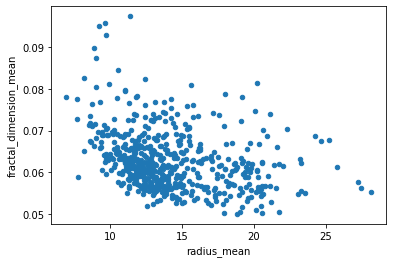

In [0]:
dfn[col_of_int].plot(kind="scatter", x=col_of_int[0], y=col_of_int[1]);

In [0]:
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
model.fit(dfn[col_of_int].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
dfn['cluster'] = model.labels_

In [0]:
centroids    =  model.cluster_centers_

In [0]:
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,14.337906,0.061642
1,11.056618,0.065378
2,19.960182,0.059978


In [0]:
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

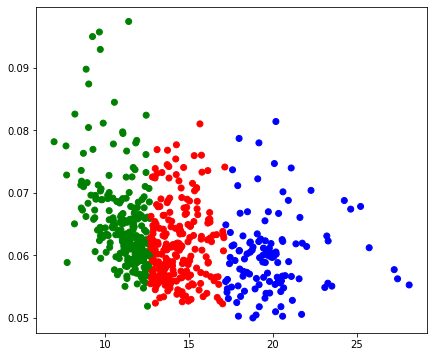

In [0]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(dfn[col_of_int[0]], dfn[col_of_int[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
from sklearn import metrics 
metrics.silhouette_score(dfn, model.labels_, metric='euclidean')

-0.07839437535371775

In [0]:
model.labels_

array([2, 2, 2, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 1,
       1, 0, 2, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0,
       2, 2, 1, 0, 0, 1, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 2,

In [0]:
col_of_int2 = ['perimeter_mean', 'area_mean']

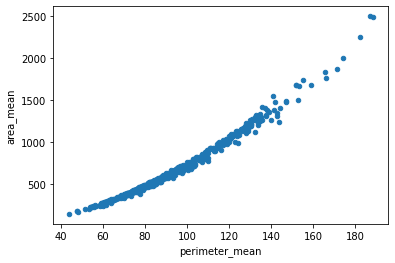

In [0]:
dfn[col_of_int2].plot(kind="scatter", x=col_of_int2[0], y=col_of_int2[1]);

In [0]:
k = 3
model = KMeans(n_clusters=k, max_iter=1)

In [0]:
model.fit(dfn[col_of_int2].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
dfn['cluster'] = model.labels_

In [0]:
centroids    =  model.cluster_centers_

In [0]:
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1
0,73.329783,404.682310
1,133.541176,1276.393137
2,96.825421,686.014737


In [0]:
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

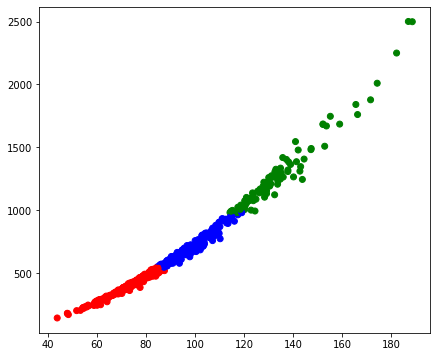

In [0]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(dfn[col_of_int2[0]], dfn[col_of_int2[1]], c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
from sklearn import metrics 
metrics.silhouette_score(dfn, model.labels_, metric='euclidean')

-0.09072525513607446

In [0]:
model.labels_

array([1, 1, 1, 0, 1, 0, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2,
       0, 1, 0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1,
       1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0, 1, 1,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1,

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
features=list(dfn.columns)
features

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32',
 'cluster']

In [0]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfn)

In [0]:
dfn_scaled = pd.DataFrame(scaled_data,columns=features)
dfn_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,cluster
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,0.0,0.178955
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,0.0,0.178955
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,0.0,0.178955
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.0,-0.940006
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,0.0,0.178955


In [0]:
dfn_scaled.mean()

id                         8.877882e-18
radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                -2.848727e-17


In [0]:
dfn_scaled[features].std()

id                         1.00088
radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [0]:
pca_features = pca.fit_transform(dfn_scaled)
pca_features[:5]

array([[ 9.12678539,  2.15296631, -1.02543376,  3.69197618, -1.2772106 ,
        -1.32741922,  0.60111833, -1.7149116 , -1.32105067, -0.18668064],
       [ 2.42647506, -3.69562668, -0.44406851,  1.14573027,  0.48994367,
        -0.0669382 , -0.13423245, -0.59819687,  0.35982512,  0.40889173],
       [ 5.73977531, -0.9644445 , -0.41557742,  0.93012142, -0.27695071,
        -0.37030087,  0.50711219,  0.20127073,  0.71327408, -0.0673509 ],
       [ 6.88526631, 10.45246524, -3.12654935,  0.20558066, -3.0781591 ,
        -2.54711757,  2.05640291, -0.73210162, -0.78204142,  1.37920462],
       [ 3.95579118, -1.85180993,  1.49970876,  2.93118487,  0.5515408 ,
         1.24262689, -0.22376691,  0.35072038,  1.01512523,  0.51238376]])

In [0]:
pca.explained_variance_ratio_

array([0.4199107 , 0.18082785, 0.08986681, 0.06195431, 0.05255261,
       0.03865984, 0.03084178, 0.02492078, 0.01824141, 0.01425999])

In [0]:
1-sum(pca.explained_variance_ratio_)

0.06796392870337364

In [0]:
num_components=len(pca.explained_variance_ratio_)
num_components

10

In [0]:
ind = np.arange(num_components) 
ind

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
vals = pca.explained_variance_ratio_
vals

array([0.4199107 , 0.18082785, 0.08986681, 0.06195431, 0.05255261,
       0.03865984, 0.03084178, 0.02492078, 0.01824141, 0.01425999])

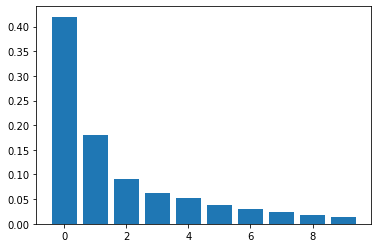

In [0]:
ind = np.arange(num_components)
num_components=len(pca.explained_variance_ratio_)
plt.bar(ind, vals);

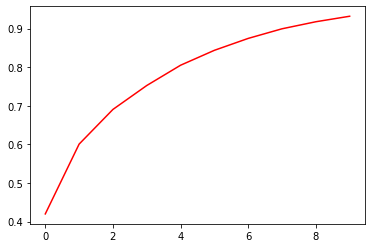

In [0]:
ind = np.arange(num_components)
vals = pca.explained_variance_ratio_
cumvals = np.cumsum(vals)
plt.plot(ind, cumvals, c='r');

In [0]:
def scree_plot(pca):

    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals, c='r')
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)

    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

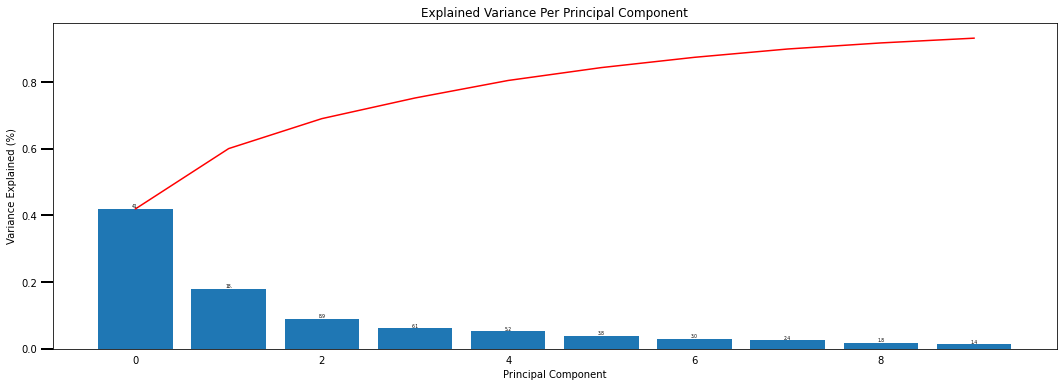

In [0]:
scree_plot(pca)

In [0]:
df_pca=pd.DataFrame(pca_features)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9
0,9.126785,2.152966,-1.025434,3.691976,-1.277211,-1.327419,0.601118,-1.714912,-1.321051,-0.186681
1,2.426475,-3.695627,-0.444069,1.145730,0.489944,-0.066938,-0.134232,-0.598197,0.359825,0.408892
2,5.739775,-0.964445,-0.415577,0.930121,-0.276951,-0.370301,0.507112,0.201271,0.713274,-0.067351
3,6.885266,10.452465,-3.126549,0.205581,-3.078159,-2.547118,2.056403,-0.732102,-0.782041,1.379205
4,3.955791,-1.851810,1.499709,2.931185,0.551541,1.242627,-0.223767,0.350720,1.015125,0.512384


In [0]:
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
df_pca['cluster'] = model.labels_

In [0]:
centroids =  model.cluster_centers_

In [0]:
cc  =  pd.DataFrame(centroids)
cc.head()

,0,1,2,3,4,5,6,7,8,9
0,3.392918,2.015081,-1.359193,-0.819366,0.251847,-0.200718,0.018381,0.296244,-0.221719,0.048356
1,-2.299804,0.113442,0.133755,0.101866,0.002394,0.022127,0.012227,-0.039871,-0.022521,-0.025395
2,4.673553,-1.919553,0.627372,0.310806,-0.202507,0.085108,-0.053034,-0.102722,0.243070,0.043178


In [0]:
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

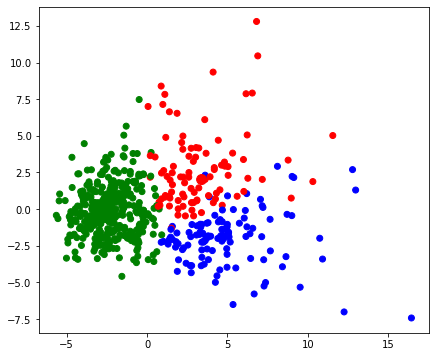

In [0]:
fig, ax =  plt.subplots(figsize=(7,6))
ax.scatter(df_pca[0], df_pca[1],c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [0]:
metrics.silhouette_score(dfn, model.labels_, metric='euclidean')

-0.0698805741283032

In [0]:
model.labels_

array([2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

The accuracy scores display a slight variance.

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project